<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Чтобы обеспечить воспроизводимость наших результатов`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
df_train.sample(30, random_state=42)


name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [5]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [6]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [7]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [8]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [9]:
df_train.columns[df_train.isnull().any()].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [10]:
df_train.duplicated().sum()

np.int64(985)

Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Можно сделать выводы:

+ О том, какие вообще есть признаки.

+ Какой тип данных в них хранится .

+ Понять примерный формат данных.

+ Увидеть, как загрузились данные.

Нельзя сделать выводы:

+ Нельзя найти все выбросы или понять среднее или медиану.

+ Наличии пропусков.

+ Ввзаимосвязях между признаками.

Достаточно ли метода duplicated для анализа дубликатов? Почему?

+ Не достаточно. Метод .duplicated ищет где каждое значение во всех столбцах совпадает с другой строкой.

+ Он не найдет смысловые дубликаты. 

In [11]:
from ydata_profiling import ProfileReport

# Строим дашборд 
profile = ProfileReport(df_train)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 187.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:

# Сейчас мы можем заполнить медианой только seats
# так как mileage, engine и max_power это строки 


# Считаем медиану для seats
seats_median = df_train['seats'].median()


# Заполняем пропуски в seats
df_train['seats'].fillna(seats_median, inplace=True)
df_test['seats'].fillna(seats_median, inplace=True)

# Проверка
print(df_train.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64


C:\Users\febor\AppData\Local\Temp\ipykernel_2852\1414635082.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['seats'].fillna(seats_median, inplace=True)
C:\Users\febor\AppData\Local\Temp\ipykernel_2852\1414635082.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [13]:
# your code here

# Список признаков 
feature_cols = df_train.columns.drop('selling_price')

# Объекты с одинаковым признаковым описанием
duplicated_features_mask = df_train.duplicated(subset=feature_cols, keep=False)
num_duplicated_objects = duplicated_features_mask.sum()

print(num_duplicated_objects)

# Сортируем по признакам, чтобы дубликаты были рядом
display(df_train[duplicated_features_mask].sort_values(by=list(feature_cols)).head(10))

# Удаляем повторяющиеся строки, оставляя первую
initial_rows = df_train.shape[0]
df_train.drop_duplicates(subset=feature_cols, keep='first', inplace=True)

# Обновим индексы
df_train.reset_index(drop=True, inplace=True)

print(f"Новая форма df_train: {df_train.shape}")

1799


name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
4485            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
1337  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
1595  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
2787  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
4485  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
6640  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   

       max_power               torque  seats  
1703  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
1836   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
117      188 bhp  400nm@ 1750-3000rpm    5.0  
1337     188 bhp  400nm@ 1750-3000rpm    5.0  
1595     188 bhp  400nm@ 1750-3000rpm    5.0  
2787     188 bhp  400nm@ 1750-3000rpm    5.0  
4485     188 bhp  400nm@ 1750-3000rpm    5.0  
6640     188 bhp  400nm@ 1750-3000rpm    5.0

Новая форма df_train: (5840, 13)


In [14]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [15]:
import numpy as np

In [16]:
cols_to_clean = ['mileage', 'engine', 'max_power']

#  функция для очистки и конвертации в float
def clean_str_features(df):
    df_copy = df.copy()
    for col in cols_to_clean:
        processed_col = df_copy[col].str.split(' ').str[0]
        processed_col = processed_col.replace('', np.nan)
        df_copy[col] = processed_col.astype(float)
        
    return df_copy

# Применяем очистку 
df_train = clean_str_features(df_train)
df_test = clean_str_features(df_test)

# Типы данных после конвертации 
print(df_train[cols_to_clean].dtypes)


# Считаем медианы на train
train_medians_cleaned = df_train[cols_to_clean].median()
print("Рассчитанные медианы")
print(train_medians_cleaned)

# Заполняем пропуски
df_train.fillna(train_medians_cleaned, inplace=True)
df_test.fillna(train_medians_cleaned, inplace=True)

# Удалим столбец torque

df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

# Проверяем
print(df_train.isnull().sum().sum())

df_train.dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object
Рассчитанные медианы
mileage        19.37
engine       1248.00
max_power      81.86
dtype: float64
0


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [17]:
cols_to_int = ['engine', 'seats']

for col in cols_to_int:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)


print(df_train.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [18]:
display(df_train.describe())


display(df_train.describe(include='object'))


display(df_test.describe())


display(df_test.describe(include='object'))

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [19]:
df_train.shape

(5840, 12)

In [20]:
assert df_train.shape == (5840, 12)

Вывод:

Числовые признаки:

+ Распределения в train и test очень похожи. Средние, медианы, std и другие квантили по всем числовым столбцам почти совпадают.


+ Видны большие разбросы в selling_price и km_driven в обеих выборках.

Категориальные признаки:

+  Для признаков fuel, seller_type, transmission и owner полностью совпадает количество уникальных значений.

+  Признак name  имеет очень много уникальных значений в обоих наборах.



Общий итог: Выборки очень похожи, что позволяет нам доверять результатам валидации на test.

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [21]:
%matplotlib inline

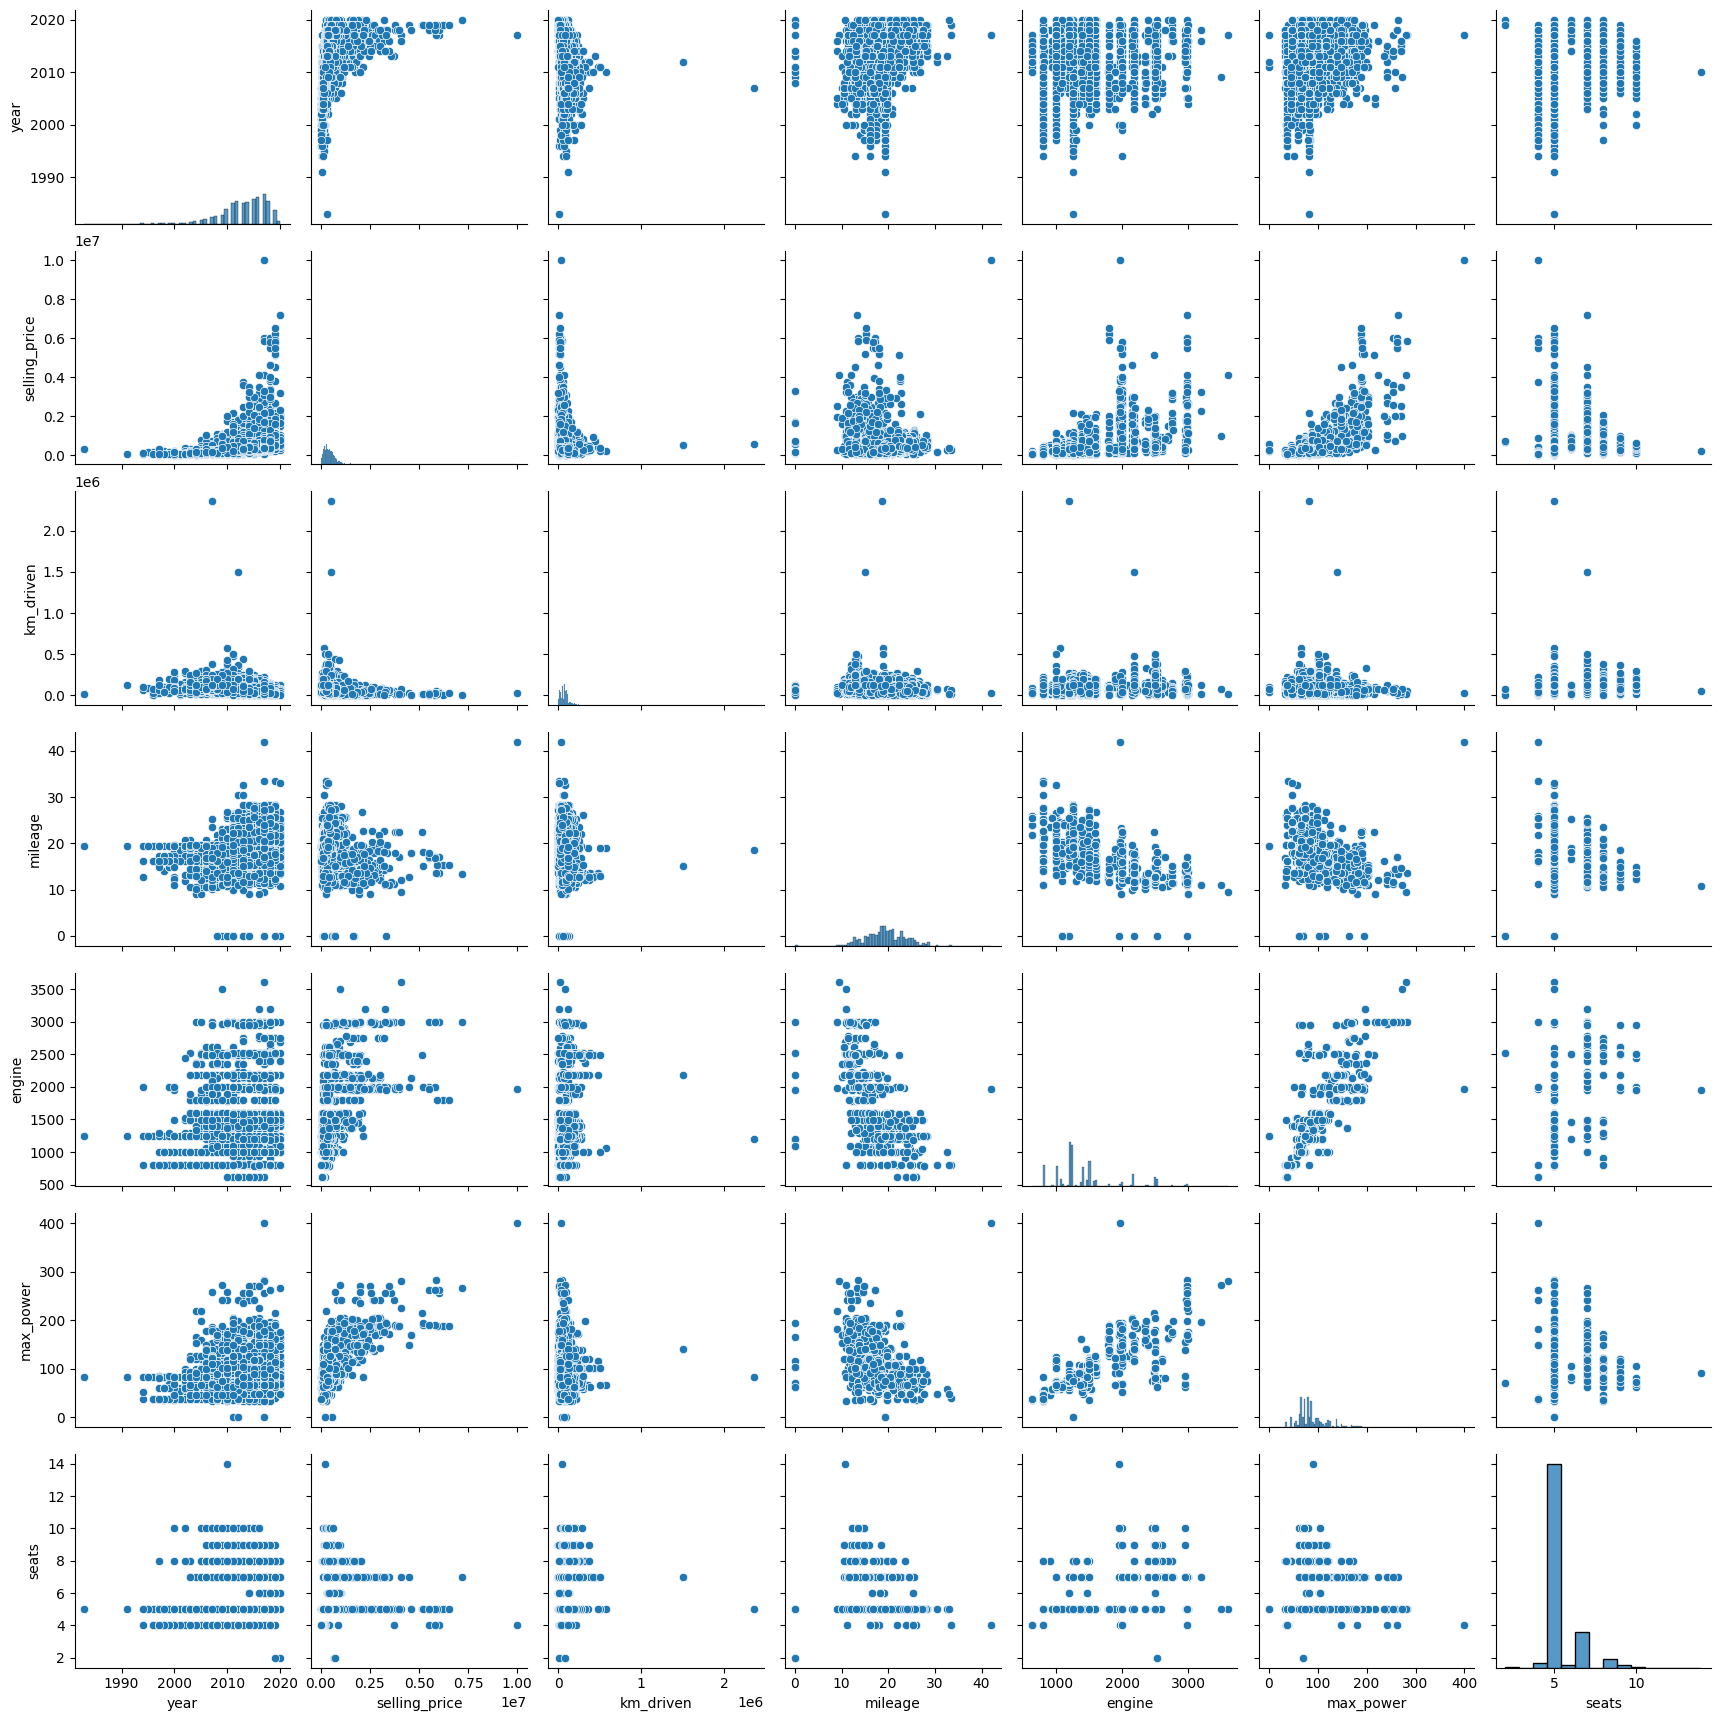

In [22]:
numeric_cols_train = df_train.select_dtypes(include=np.number).columns

sns.pairplot(df_train[numeric_cols_train])
plt.show()

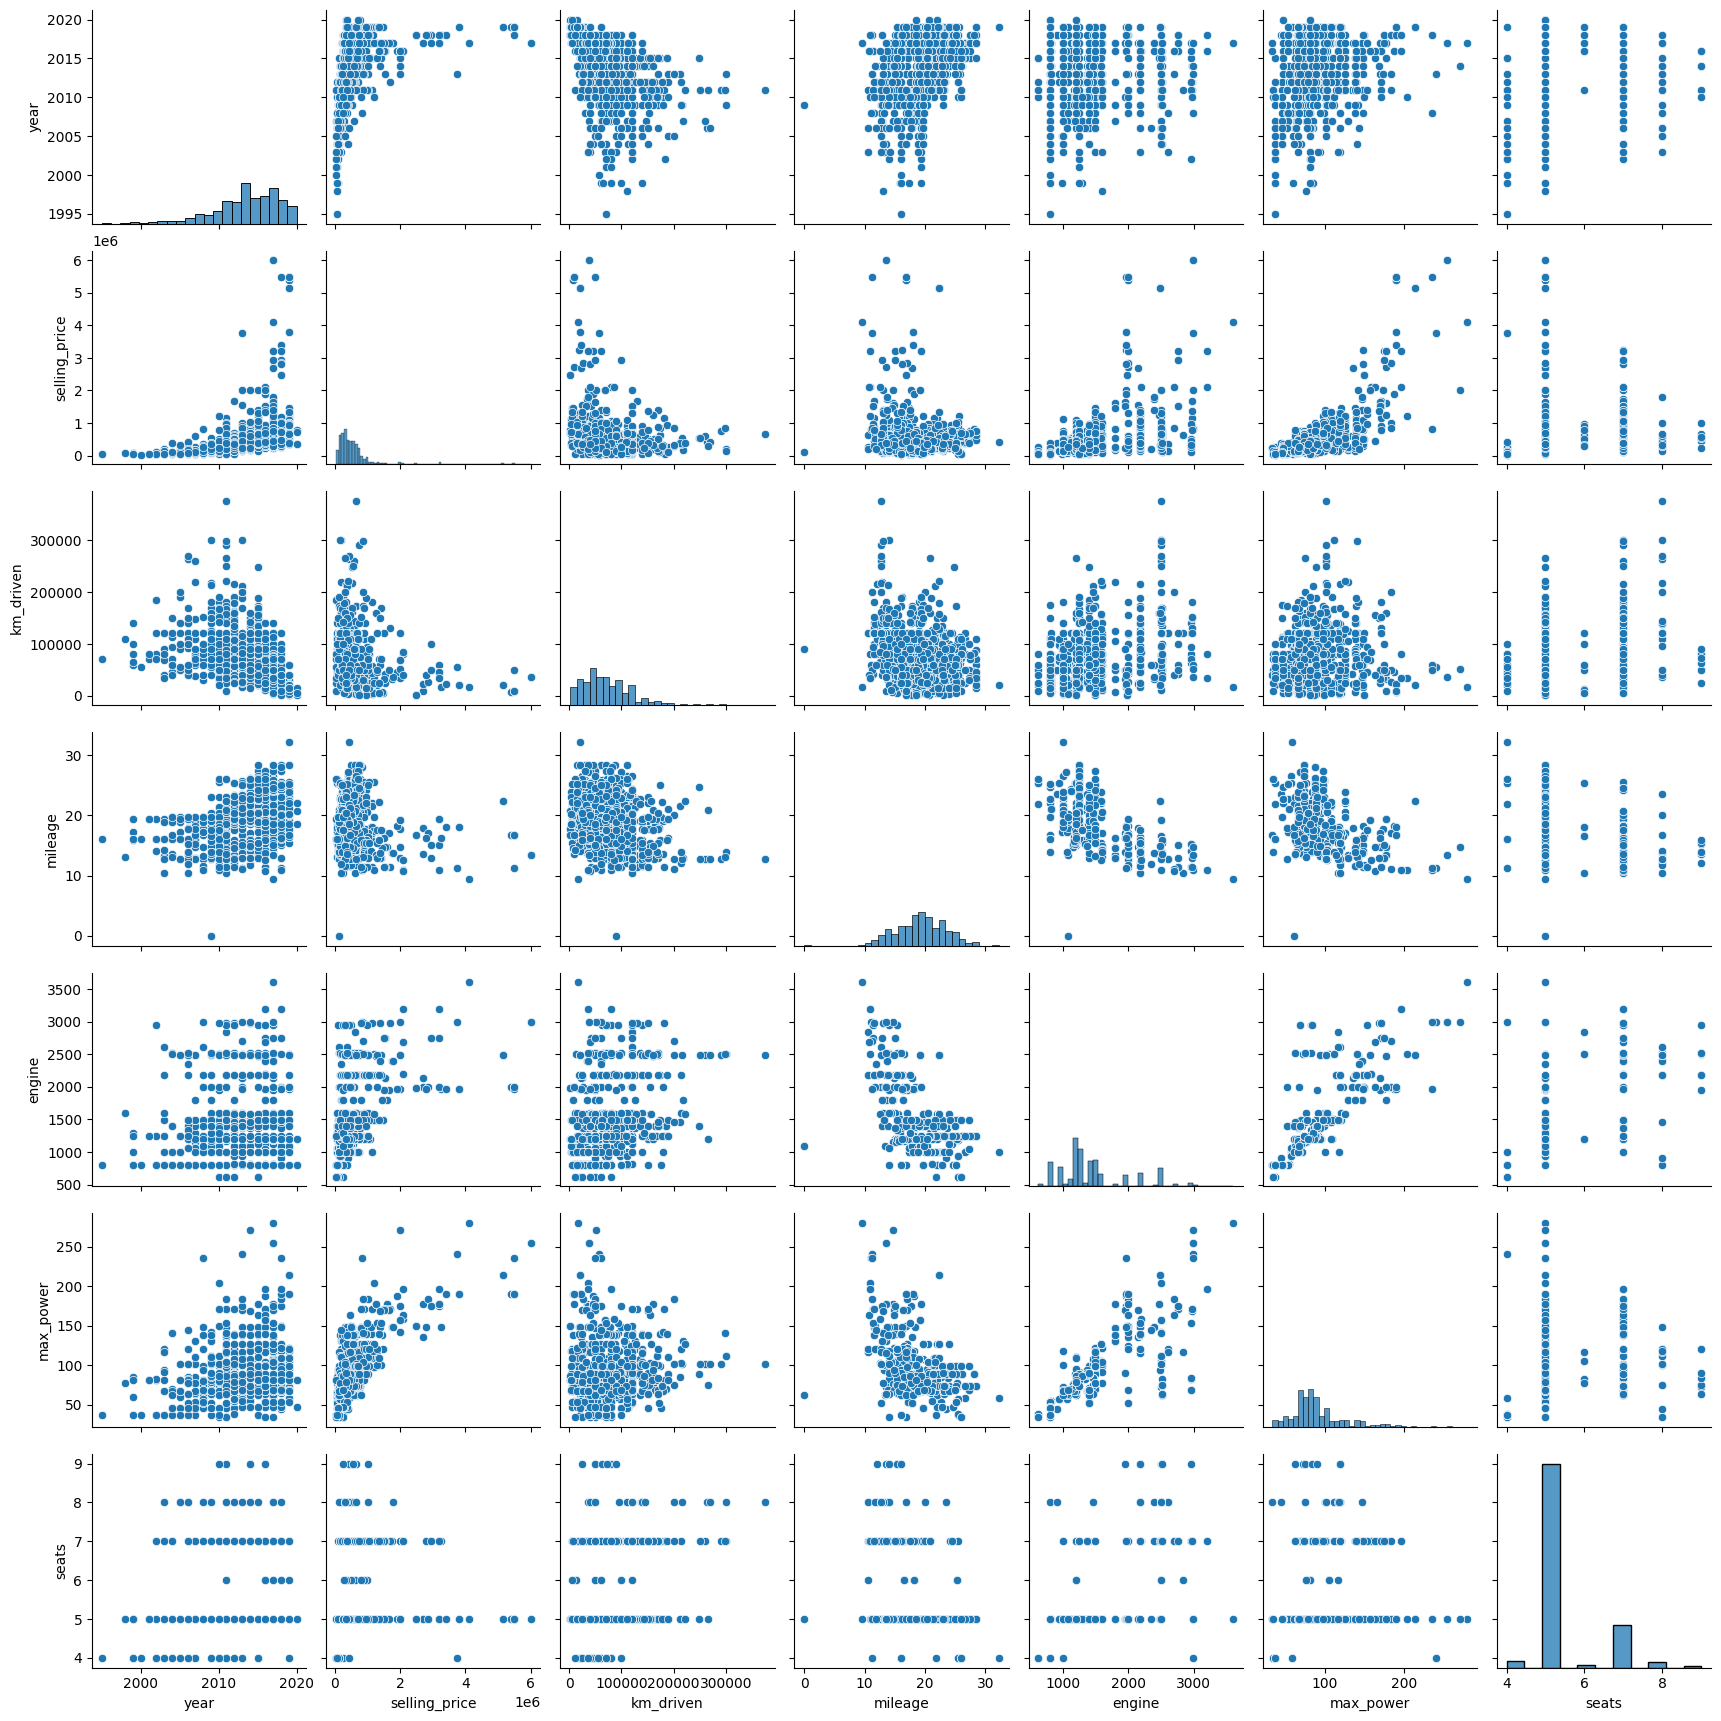

In [23]:
numeric_cols_test = df_test.select_dtypes(include=np.number).columns


sns.pairplot(df_test[numeric_cols_test])
plt.show()

Train:

Можно ли предположить на основе распределений связь признаков с целевой переменной?

Да, можно. 

+ year:  положительный тренд (чем новее машина, тем выше цена).

+ max_power: положительный тренд (чем больше мощность, тем выше цена).

+ km_driven: отрицательный тренд (чем больше пробег, тем ниже цена).

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

+ Да. Например, max_power и engine выглядят сильно скоррелированными. year и km_driven имеют отрицательную связь.

Test:

Похожими ли оказались совокупности при разделении на трейн и тест?

+ Да, очень похожи. Гистограммы на диагонали и взаимосвязи в test выглядят почти так же, как в train. 

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


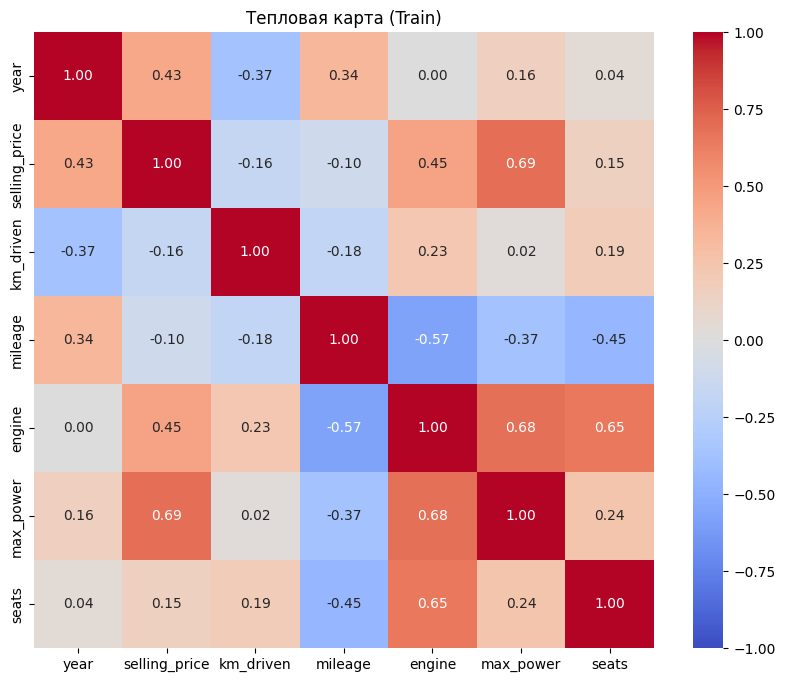

In [24]:
corr_matrix = df_train[numeric_cols_train].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Тепловая карта (Train)')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Какие 2 признака наименее скоррелированы между собой?

+ Наименее скоррелированы  это year и engine.

Между какими наблюдается довольно сильная положительная линейная зависимость?

+ Самая сильная положительная связь у selling_price и max_power (0.69), а также у engine и max_power (0.68).

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

+ Да, правильно. Это отрицательная корреляция. Чем меньше год , тем больше у нее пробег.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

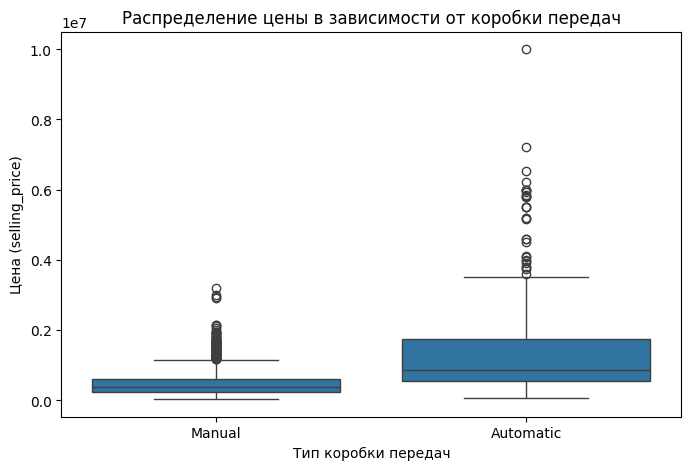

In [25]:
# your code here
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='selling_price', data=df_train)
plt.title('Распределение цены в зависимости от коробки передач')
plt.ylabel('Цена (selling_price)')
plt.xlabel('Тип коробки передач')
plt.show()

Логично предположить, что машины с автоматической коробкой передач в среднем дороже, чем с ручной.

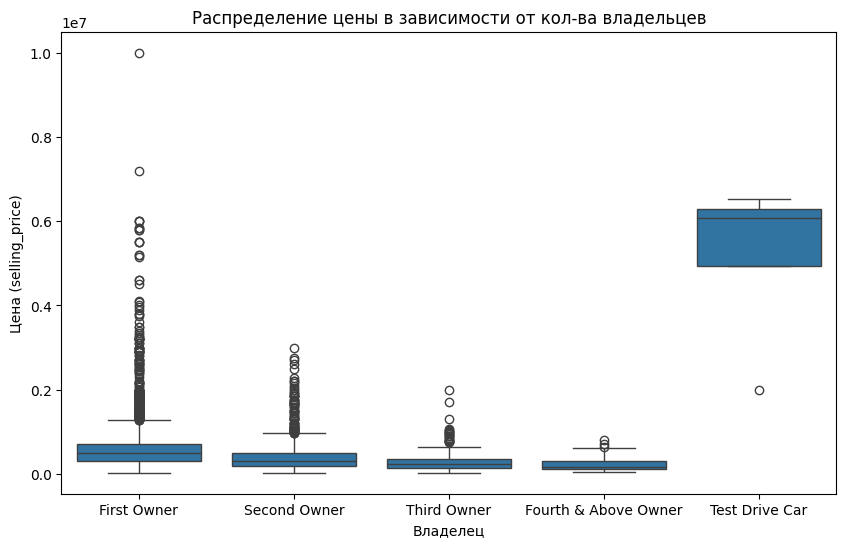

In [26]:

plt.figure(figsize=(10, 6))
# Сортируем
owner_order = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']
sns.boxplot(x='owner', y='selling_price', data=df_train, order=owner_order)
plt.title('Распределение цены в зависимости от кол-ва владельцев')
plt.ylabel('Цена (selling_price)')
plt.xlabel('Владелец')
plt.show()

Машина от первого владельца наверняка будет стоить дороже, чем машина от третьего или четвертого

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [27]:
# Создаем копии с вещественными признаками
numeric_features = df_train.select_dtypes(include=np.number).columns

y_train = df_train['selling_price']
X_train = df_train[numeric_features.drop('selling_price')]



In [28]:
# опишите выбранные вещественные признаки
print(X_train.columns.tolist())
display(X_train.head())

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


year  km_driven  mileage  engine  max_power  seats
0  2014     145500    23.40    1248      74.00      5
1  2014     120000    21.14    1498     103.52      5
2  2010     127000    23.00    1396      90.00      5
3  2007     120000    16.10    1298      88.20      5
4  2017      45000    20.14    1197      81.86      5

In [29]:
y_test = df_test['selling_price']
X_test = df_test[X_train.columns]

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Обучаем 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказания
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Метрика

print(f"Train R^2: {r2_score(y_train, y_train_pred_lr):.4f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_lr):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_lr):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_lr):.2f}")

Train R^2: 0.5923
Test R^2: 0.5941
Train MSE: 116874153930.03
Test MSE: 233298779730.46


Выводы по метрикам:

Модель показывает R^2  около 0.59 на тесте. Это значит, что наша модель на 59% объясняет дисперсию цены автомобиля, используя только 6 числовых признаков. 

Значение R^2 на train очень близко к R^2 на test . Это говорит о том, что переобучения нет.

MSE  большая, но и сами цены на машины имеют большой разброс.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [31]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)

# Применяем transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])

[[ 0.13956959  1.19115249  0.995867   -0.37364298 -0.43955049 -0.43441899]
 [ 0.13956959  0.76661943  0.42883018  0.14116151  0.49351327 -0.43441899]
 [-0.83716668  0.88315792  0.8955065  -0.06887872  0.06617512 -0.43441899]
 [-1.56971888  0.76661943 -0.83571209 -0.27068208  0.00928099 -0.43441899]
 [ 0.8721218  -0.48200722  0.17792894 -0.4786631  -0.19111278 -0.43441899]]


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [32]:
# your code here
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# веса
coefs = pd.Series(lr_scaled.coef_, index=X_train.columns)

print(coefs.abs().sort_values(ascending=False))

max_power    322807.353259
year         152772.570846
engine        61178.494337
km_driven     44158.818520
mileage       28833.925778
seats         23209.132486
dtype: float64


Наболее информативный - max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [33]:
from sklearn.linear_model import Lasso

# Обучаем
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

# Качество
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)


print(f"Train R^2: {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_lasso):.4f}")

Train R^2: 0.5923
Test R^2: 0.5941


In [34]:
# Проверяем веса
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)


print(lasso_coefs)

num_zeroed = (lasso_coefs == 0).sum()
print(f"\nКоличество зануленных весов: {num_zeroed}")

year         152772.390214
km_driven    -44157.689858
mileage       28832.043396
engine        61173.662409
max_power    322808.236919
seats        -23206.255649
dtype: float64

Количество зануленных весов: 0


L1 с параметром по умолчанию  не занулила ни одного веса.

Вероятно, alpha=1.0 слишком мал для этого набора данных. Все 6 признаков, которые мы отобрали имеют  заметную связь с ценой и модель думает, что все они полезны. Чтобы L1 выкидывала признаки, нужно сделать штраф больше.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [35]:
from sklearn.model_selection import GridSearchCV

# Lasso
lasso_model = Lasso(max_iter=10000) # Увеличим, на всякий случай)


param_grid_lasso = {
    'alpha': np.logspace(-2, 3, 10) 
}

# Создаем 
gs_lasso = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid_lasso,
    cv=10,
    scoring='r2', # Метрика качества R2
    n_jobs=-1 # Используем все ядра
)

gs_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])},
             scoring='r2')

In [36]:
# Ответы на вопросы 


# Сколько моделей обучилось?
n_alphas = len(param_grid_lasso['alpha'])
n_folds = 10
print(f"Всего было обучено моделей: {n_alphas}  * {n_folds}  = {n_alphas * n_folds}")

# Какой коэффициент регуляризации у лучшей модели?
best_alpha_lasso = gs_lasso.best_params_['alpha']
print(f"Лучший коэффициент: {best_alpha_lasso:.4f}")

# Занулились ли веса?
best_lasso_model = gs_lasso.best_estimator_
best_lasso_coefs = pd.Series(best_lasso_model.coef_, index=X_train.columns)

print("\nВеса лучшего Lasso:")
print(best_lasso_coefs)
num_zeroed_best_lasso = (best_lasso_coefs == 0).sum()
print(f"\nКоличество зануленных весов у лучшей модели: {num_zeroed_best_lasso}")

# качество
y_test_pred_gs_lasso = best_lasso_model.predict(X_test_scaled)
print(f"\nTest R^2 у лучшей Lasso: {r2_score(y_test, y_test_pred_gs_lasso):.4f}")

Всего было обучено моделей: 10  * 10  = 100
Лучший коэффициент: 1000.0000

Веса лучшего Lasso:
year         152556.386616
km_driven    -43052.234680
mileage       27010.694999
engine        56435.714938
max_power    323666.834812
seats        -20352.142469
dtype: float64

Количество зануленных весов у лучшей модели: 0

Test R^2 у лучшей Lasso: 0.5930


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [37]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet(max_iter=10000)

# Сетка 
param_grid_enet = {
    'alpha': np.logspace(-2, 3, 10), 
    'l1_ratio': [0.1, 0.5, 0.9]   
}

# Создаем
gs_enet = GridSearchCV(
    estimator=enet_model,
    param_grid=param_grid_enet,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

gs_enet.fit(X_train_scaled, y_train)


print("\n Результаты GridSearchCV ")

# Сколько моделей обучилось?
n_alphas_en = len(param_grid_enet['alpha'])
n_ratios_en = len(param_grid_enet['l1_ratio'])
print(f"Всего было обучено моделей: {n_alphas_en} * {n_ratios_en} * {n_folds} = {n_alphas_en * n_ratios_en * n_folds}")

# Какие гиперпараметры у лучшей модели?
print(f"Лучшие гиперпараметры: {gs_enet.best_params_}")

# Качество
best_enet_model = gs_enet.best_estimator_
y_test_pred_gs_enet = best_enet_model.predict(X_test_scaled)
print(f"\nTest R^2 у лучшей ElasticNet: {r2_score(y_test, y_test_pred_gs_enet):.4f}")


 Результаты GridSearchCV 
Всего было обучено моделей: 10 * 3 * 10 = 300
Лучшие гиперпараметры: {'alpha': np.float64(1.6681005372000592), 'l1_ratio': 0.9}

Test R^2 у лучшей ElasticNet: 0.5580


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [38]:

# Сначала создадим датасеты со всеми признаками (кроме цены)
y_train = df_train['selling_price']
X_train_cat = df_train.drop('selling_price', axis=1)

y_test = df_test['selling_price']
X_test_cat = df_test.drop('selling_price', axis=1)


# Удаляем
X_train_cat.drop('name', axis=1, inplace=True)
X_test_cat.drop('name', axis=1, inplace=True)

print(X_train_cat.shape)
print(X_test_cat.shape)

(5840, 10)
(1000, 10)


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [39]:
assert X_train_cat.shape == (5840, 10)

In [40]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Разделим  на числовые и категориальные

numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' 
)

# Обучаем на X_train_cat
X_train_final = preprocessor.fit_transform(X_train_cat)

# Применяем к X_test_cat
X_test_final = preprocessor.transform(X_test_cat)

# Получим имена
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_feature_names)

print(X_train_final.shape)
print(X_test_final.shape)

print("\nПример обработанных данных:")
print(X_train_final[0])

print(f"\nВсего признаков: {len(all_feature_names)}")
print(all_feature_names)

(5840, 23)
(1000, 23)

Пример обработанных данных:
[ 0.13956959  1.19115249  0.995867   -0.37364298 -0.43955049  1.
  0.          0.          1.          0.          1.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.        ]

Всего признаков: 23
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14']


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [42]:
from sklearn.linear_model import Ridge

#Создаем модель
ridge = Ridge()

# Создаем сетку параметров
param_grid_ridge = {
    'alpha': np.logspace(-1, 4, 10) 
}

# GridSearchCV
gs_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=10,
    scoring='r2', 
    n_jobs=-1
)

# Обучаем 
gs_ridge.fit(X_train_final, y_train)

print(f"Лучший параметр alpha: {gs_ridge.best_params_['alpha']:.4f}")
print(f"Лучший R^2 на кросс-валидации: {gs_ridge.best_score_:.4f}")

# 3. Оцениваем
best_ridge = gs_ridge.best_estimator_
y_train_pred_ridge = best_ridge.predict(X_train_final)
y_test_pred_ridge = best_ridge.predict(X_test_final)

print(f"Train R^2: {r2_score(y_train, y_train_pred_ridge):.4f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_ridge):.4f}")

Лучший параметр alpha: 4.6416
Лучший R^2 на кросс-валидации: 0.6219
Train R^2: 0.6597
Test R^2: 0.6427


Да, удалось

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [43]:
def business_metric(y_true, y_pred):
    
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)
    
    # Абсолютная разница
    abs_diff = np.abs(y_true_np - y_pred_np)
    
    # Допустимое отклонение 
    threshold = 0.10 * y_true_np
    
    # Количество прогнозов
    correct_predictions = np.sum(abs_diff <= threshold)
    
    # Возвращаем долю
    return correct_predictions / len(y_true_np)

# Линейная регрессия 
metric_lr = business_metric(y_test, y_test_pred_lr)
print(f"LR: {metric_lr:.4f} (R^2: {r2_score(y_test, y_test_pred_lr):.4f})")

# Lasso 
y_test_pred_gs_lasso = gs_lasso.best_estimator_.predict(X_test_scaled)
metric_gs_lasso = business_metric(y_test, y_test_pred_gs_lasso)
print(f"Lasso: {metric_gs_lasso:.4f} (R^2: {r2_score(y_test, y_test_pred_gs_lasso):.4f})")

# ElasticNet 
y_test_pred_gs_enet = gs_enet.best_estimator_.predict(X_test_scaled)
metric_gs_enet = business_metric(y_test, y_test_pred_gs_enet)
print(f"ElasticNet: {metric_gs_enet:.4f} (R^2: {r2_score(y_test, y_test_pred_gs_enet):.4f})")

# Ridge 
# y_test_pred_ridge уже есть
metric_gs_ridge = business_metric(y_test, y_test_pred_ridge)
print(f"Ridge (числовые + катеригинальные): {metric_gs_ridge:.4f} (R^2: {r2_score(y_test, y_test_pred_ridge):.4f})")

LR: 0.2270 (R^2: 0.5941)
Lasso: 0.2250 (R^2: 0.5930)
ElasticNet: 0.2460 (R^2: 0.5580)
Ridge (числовые + катеригинальные): 0.2470 (R^2: 0.6427)


Лучше всего задачу бизнеса решает модель Ridge

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.